In [1]:
import datetime
import time
import math
import numpy as np
import pandas as pd
import sys

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import f_regression

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import statsmodels.api as sm
# from scipy import stats

# X2 = sm.add_constant(X)
# est = sm.OLS(y, X2)
# est2 = est.fit()
# print(est2.summary())

#Poor Care = 1
#Good Care = 0

In [2]:
quality = pd.read_csv('quality.csv')

In [3]:
quality.head(10)

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731.000000,10,18,21,93,222,False,0,0
1,2,1,1,6,1,411.000000,0,8,27,19,115,False,1,0
2,3,0,0,5,3,731.000000,10,5,16,27,148,False,5,0
3,4,0,1,19,0,158.000000,34,20,14,59,242,False,0,0
4,5,8,2,19,3,449.000000,10,29,24,51,204,False,0,0
5,6,2,0,9,2,731.000000,6,11,40,53,156,False,4,1
6,7,16,1,8,1,173.958333,4,25,19,40,261,False,0,0
7,8,2,0,8,0,731.000000,5,10,11,28,87,False,0,0
8,9,2,1,4,3,45.000000,5,7,28,20,98,False,0,1
9,10,4,2,0,2,104.000000,2,6,21,17,66,False,0,0


In [4]:
quality.count()

MemberID                131
InpatientDays           131
ERVisits                131
OfficeVisits            131
Narcotics               131
DaysSinceLastERVisit    131
Pain                    131
TotalVisits             131
ProviderCount           131
MedicalClaims           131
ClaimLines              131
StartedOnCombination    131
AcuteDrugGapSmall       131
PoorCare                131
dtype: int64

In [5]:
quality.describe()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,AcuteDrugGapSmall,PoorCare
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,66.000000,2.717557,1.496183,13.229008,4.572519,480.567112,15.557252,17.442748,23.984733,43.244275,142.862595,2.694656,0.251908
std,37.960506,5.099434,2.167501,9.077076,9.713615,274.767240,20.418001,12.298318,13.670285,28.886540,91.629921,6.983379,0.435775
min,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,5.000000,11.000000,20.000000,0.000000,0.000000
25%,33.500000,0.000000,0.000000,7.000000,0.000000,206.958333,1.000000,8.000000,15.000000,25.500000,83.500000,0.000000,0.000000
50%,66.000000,0.000000,1.000000,12.000000,1.000000,640.958333,8.000000,15.000000,20.000000,37.000000,120.000000,1.000000,0.000000
75%,98.500000,3.000000,2.000000,18.500000,3.000000,731.000000,23.000000,22.500000,30.000000,49.500000,185.000000,3.000000,0.500000
max,131.000000,30.000000,11.000000,46.000000,59.000000,731.000000,104.000000,69.000000,82.000000,194.000000,577.000000,71.000000,1.000000


In [6]:
quality.groupby(['PoorCare']).size()

PoorCare
0    98
1    33
dtype: int64

In [7]:
#Baseline model will have probability of 98/131 = 75%

In [8]:
qualityCrossTab = pd.crosstab(index = quality['Narcotics'], columns=quality['PoorCare'], margins = True)

In [9]:
qualityCrossTab

PoorCare,0,1,All
Narcotics,,,
0,43,6,49
1,22,4,26
2,9,7,16
3,11,2,13
4,3,0,3
5,2,0,2
6,1,1,2
8,1,0,1
9,2,1,3


In [10]:
feature_cols = ['Narcotics', 'OfficeVisits']
X = quality[feature_cols]
y = quality.PoorCare

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [12]:
y_train.head()

63     1
100    1
45     1
15     0
93     0
Name: PoorCare, dtype: int64

In [13]:
quality.groupby(['PoorCare']).size()

PoorCare
0    98
1    33
dtype: int64

In [14]:
len(quality)

131

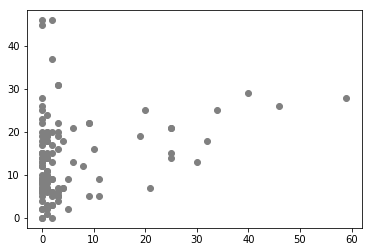

In [15]:
plt.scatter(quality['Narcotics'], quality['OfficeVisits'],  color='gray')

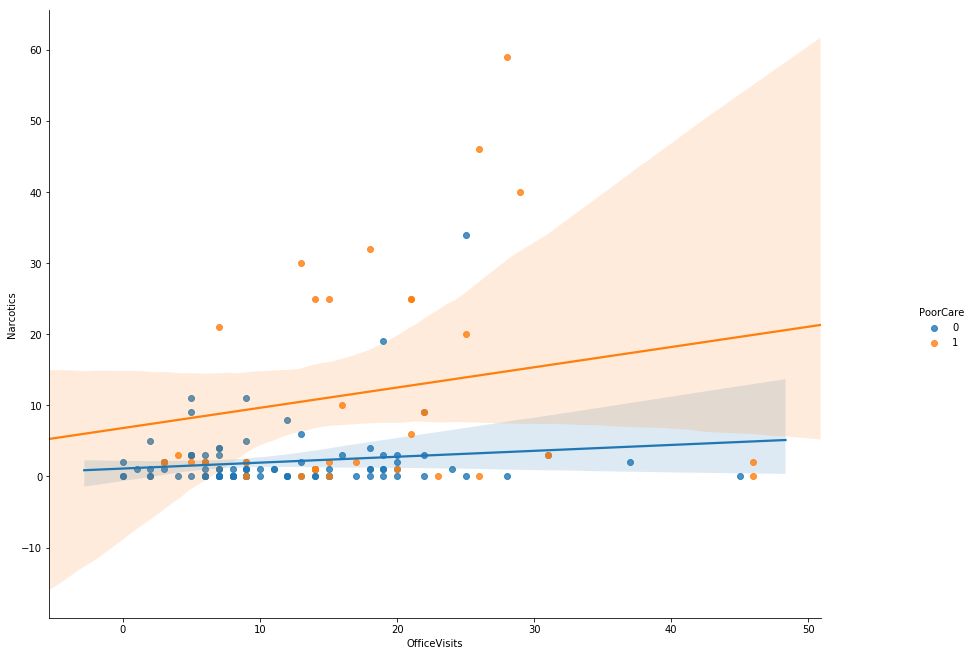

In [16]:
import seaborn as sns
sns.lmplot('OfficeVisits', 'Narcotics', quality, hue='PoorCare', fit_reg=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

In [17]:
HealthClassifier = LogisticRegression()  
HealthClassifier.fit(X_train, y_train) #training the algorithm

/opt/cloudera/parcels/Anaconda-4.0.0/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
HealthClassifier.coef_

array([[0.08953801, 0.04510742]])

In [19]:
HealthClassifier.intercept_

array([-1.94322147])

In [20]:
y_pred = HealthClassifier.predict(X_test)

In [21]:
health_cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [22]:
health_cnf_matrix

array([[27,  0],
       [ 3,  3]])

## Visualize the confusion matrix


Text(0.5,257.44,'Predicted label')

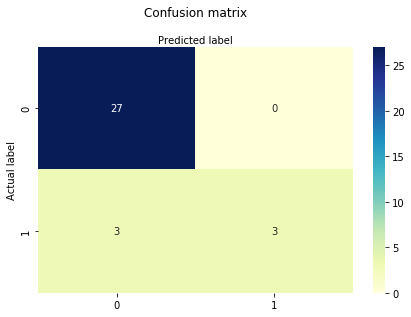

In [23]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(health_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

('Accuracy:', 0.9090909090909091)
('Precision:', 1.0)
('Recall:', 0.5)


## ROC curve

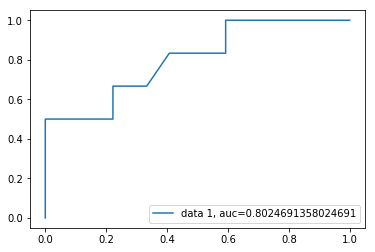

In [25]:
y_pred_proba = HealthClassifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Video 50 to 56 - Framingham Heart Study

In [26]:
framingham = pd.read_csv('framingham.csv')

In [27]:
framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [28]:
framingham.fillna(framingham.mean(), inplace=True)

In [29]:
framingham.shape

(4240, 16)

In [30]:
framingham.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.007082,0.500024,11.881610,0.168481,0.076569,0.462799,0.158280,44.327521,22.033300,11.910394,4.070687,12.023929,22.831748,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [31]:
framingham.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


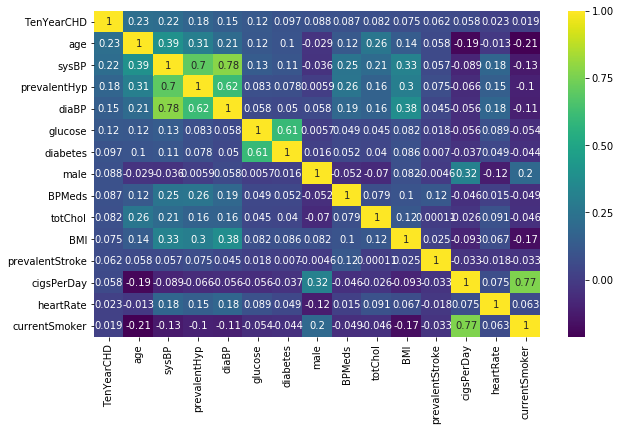

In [32]:
df = framingham

numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns

categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
categorical_feature_columns

target = 'TenYearCHD'

k = 15 #number of variables for heatmap
cols = df[numerical_feature_columns].corr().nlargest(k, target)[target].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [33]:
framingham.currentSmoker.value_counts()

0    2145
1    2095
Name: currentSmoker, dtype: int64

In [34]:
X = framingham.loc[:, framingham.columns != 'TenYearCHD']
Y = framingham.loc[:, framingham.columns == 'TenYearCHD']

In [35]:
Y.shape

(4240, 1)

In [36]:
X.shape

(4240, 15)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.35, 
                                                    random_state=8)

In [38]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2756 entries, 3542 to 1364
Data columns (total 15 columns):
male               2756 non-null int64
age                2756 non-null int64
education          2756 non-null float64
currentSmoker      2756 non-null int64
cigsPerDay         2756 non-null float64
BPMeds             2756 non-null float64
prevalentStroke    2756 non-null int64
prevalentHyp       2756 non-null int64
diabetes           2756 non-null int64
totChol            2756 non-null float64
sysBP              2756 non-null float64
diaBP              2756 non-null float64
BMI                2756 non-null float64
heartRate          2756 non-null float64
glucose            2756 non-null float64
dtypes: float64(9), int64(6)
memory usage: 344.5 KB


In [39]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1484 entries, 2021 to 1311
Data columns (total 15 columns):
male               1484 non-null int64
age                1484 non-null int64
education          1484 non-null float64
currentSmoker      1484 non-null int64
cigsPerDay         1484 non-null float64
BPMeds             1484 non-null float64
prevalentStroke    1484 non-null int64
prevalentHyp       1484 non-null int64
diabetes           1484 non-null int64
totChol            1484 non-null float64
sysBP              1484 non-null float64
diaBP              1484 non-null float64
BMI                1484 non-null float64
heartRate          1484 non-null float64
glucose            1484 non-null float64
dtypes: float64(9), int64(6)
memory usage: 185.5 KB


In [40]:
framingham_lr = LogisticRegression()      
framingham_lr_baseline_model = framingham_lr.fit(x_train,y_train)

/opt/cloudera/parcels/Anaconda-4.0.0/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
print(framingham_lr_baseline_model.coef_)

print(framingham_lr_baseline_model.intercept_)

[[ 4.17506711e-01  4.79315109e-02 -6.62472947e-02  9.00552884e-03
   1.98164628e-02  4.29915756e-01  8.43998325e-01  3.41855963e-01
   4.03173562e-01 -1.34434928e-05  1.97347198e-02 -1.88686125e-02
  -2.22199425e-02 -5.95869248e-03  2.87670891e-03]]
[-4.92355888]


In [42]:
y_pred = framingham_lr_baseline_model.predict(x_test)

In [43]:
framingham_lr_cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [44]:
framingham_lr_cnf_matrix

array([[1248,    5],
       [ 216,   15]])

Text(0.5,257.44,'Predicted label')

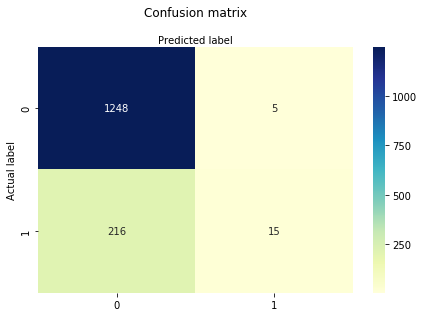

In [45]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(framingham_lr_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

('Accuracy:', 0.851078167115903)
('Precision:', 0.75)
('Recall:', 0.06493506493506493)


#### Video 57 to 62: Reitation 3. Election Forecasting

In [47]:
#Read raw polling data
polling = pd.read_csv('PollingData.csv')

In [48]:
#Count the number of non-missing column values.
polling.count()

State         145
Year          145
Rasmussen      99
SurveyUSA      74
DiffCount     145
PropR         145
Republican    145
dtype: int64

In [49]:
#Basic information about each column in the dataframe. It's a superset of count.
polling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 7 columns):
State         145 non-null object
Year          145 non-null int64
Rasmussen     99 non-null float64
SurveyUSA     74 non-null float64
DiffCount     145 non-null int64
PropR         145 non-null float64
Republican    145 non-null int64
dtypes: float64(3), int64(3), object(1)
memory usage: 8.0+ KB


In [50]:
#Print basic statistics for the dataframe.
polling.describe()

,Year,Rasmussen,SurveyUSA,DiffCount,PropR,Republican
count,145.000000,99.000000,74.000000,145.000000,145.000000,145.000000
mean,2007.862069,0.040404,-0.824324,-1.268966,0.525943,0.510345
std,3.245982,13.426990,14.257282,6.353318,0.466495,0.501626
min,2004.000000,-41.000000,-33.000000,-19.000000,0.000000,0.000000
25%,2004.000000,-8.000000,-11.750000,-6.000000,0.000000,0.000000
50%,2008.000000,1.000000,-2.000000,1.000000,0.625000,1.000000
75%,2012.000000,8.500000,8.000000,4.000000,1.000000,1.000000
max,2012.000000,39.000000,30.000000,11.000000,1.000000,1.000000


In [51]:
#Get the number of records for each year in the dataframe.
polling.Year.value_counts()

2008    50
2004    50
2012    45
Name: Year, dtype: int64

In [52]:
#Count the number of missing records for each column.
polling.isnull().sum()

State          0
Year           0
Rasmussen     46
SurveyUSA     71
DiffCount      0
PropR          0
Republican     0
dtype: int64

In [53]:
#Count the number of rows where atleast one column value is missing.
polling.isnull().sum().sum()

117

In [54]:
polling.head()

,State,Year,Rasmussen,SurveyUSA,DiffCount,PropR,Republican
0,Alabama,2004,11.0,18.0,5,1.0,1
1,Alabama,2008,21.0,25.0,5,1.0,1
2,Alaska,2004,NaN,NaN,1,1.0,1
3,Alaska,2008,16.0,NaN,6,1.0,1
4,Arizona,2004,5.0,15.0,8,1.0,1


In [55]:
#Missing value imputation using MICE

In [56]:
from  statsmodels.imputation import mice

In [57]:
test = polling.select_dtypes([np.number])

In [58]:
imp = mice.MICEData(test)

In [67]:
imp.update_all()

In [68]:
imputed = imp.data

In [69]:
polling.Rasmussen = imputed.Rasmussen

In [70]:
polling.SurveyUSA = imputed.SurveyUSA

In [71]:
polling.head()

,State,Year,Rasmussen,SurveyUSA,DiffCount,PropR,Republican
0,Alabama,2004,11.0,18.0,5,1.0,1
1,Alabama,2008,21.0,25.0,5,1.0,1
2,Alaska,2004,10.0,19.0,1,1.0,1
3,Alaska,2008,16.0,8.0,6,1.0,1
4,Arizona,2004,5.0,15.0,8,1.0,1


In [72]:
polling.count()

State         145
Year          145
Rasmussen     145
SurveyUSA     145
DiffCount     145
PropR         145
Republican    145
dtype: int64

In [73]:
polling.describe()

,Year,Rasmussen,SurveyUSA,DiffCount,PropR,Republican
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,2007.862069,1.875862,0.793103,-1.268966,0.525943,0.510345
std,3.245982,14.957757,14.583522,6.353318,0.466495,0.501626
min,2004.000000,-41.000000,-33.000000,-19.000000,0.000000,0.000000
25%,2004.000000,-8.000000,-12.000000,-6.000000,0.000000,0.000000
50%,2008.000000,3.000000,1.000000,1.000000,0.625000,1.000000
75%,2012.000000,11.000000,14.000000,4.000000,1.000000,1.000000
max,2012.000000,39.000000,30.000000,11.000000,1.000000,1.000000


In [74]:
#Splitting the data into train and test. We will use data from 2008 and 2004 for train. We will use data from 2012 for test.

train = polling[(polling.Year ==2004) | (polling.Year ==2008)]

In [75]:
train.Year.value_counts()

2008    50
2004    50
Name: Year, dtype: int64

In [76]:
test = polling[(polling.Year ==2012)]

In [77]:
test.Year.value_counts()

2012    45
Name: Year, dtype: int64

In [78]:
train.Republican.value_counts()

1    53
0    47
Name: Republican, dtype: int64

In [79]:
train.head()

,State,Year,Rasmussen,SurveyUSA,DiffCount,PropR,Republican
0,Alabama,2004,11.0,18.0,5,1.0,1
1,Alabama,2008,21.0,25.0,5,1.0,1
2,Alaska,2004,10.0,19.0,1,1.0,1
3,Alaska,2008,16.0,8.0,6,1.0,1
4,Arizona,2004,5.0,15.0,8,1.0,1


In [80]:
# Base model
train['SignedRep'] = train['Rasmussen'].apply(lambda x: np.sign(x))

train[train.SignedRep<0].head()

/opt/cloudera/parcels/Anaconda-4.0.0/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,State,Year,Rasmussen,SurveyUSA,DiffCount,PropR,Republican,SignedRep
10,California,2004,-11.0,-11.0,-8,0.0,0,-1.0
11,California,2008,-27.0,-24.0,-5,0.0,0,-1.0
14,Colorado,2008,-4.0,-16.0,-15,0.0,0,-1.0
16,Connecticut,2004,-24.0,-16.0,-3,0.0,0,-1.0
17,Connecticut,2008,-17.0,-16.0,-4,0.0,0,-1.0


In [81]:
cross = pd.crosstab(index=train["Republican"], 
                             columns=train["SignedRep"],
                             margins=True)

cross
# train[['SignedRep','Republican']]

SignedRep,-1.0,0.0,1.0,All
Republican,,,,
0,41,2,4,47
1,0,1,52,53
All,41,3,56,100


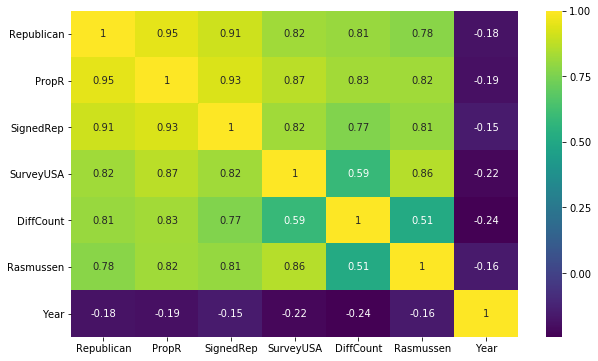

In [82]:
#Check for correlation

df = train

numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns

categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
categorical_feature_columns

target = 'Republican'

k = 15 #number of variables for heatmap
cols = df[numerical_feature_columns].corr().nlargest(k, target)[target].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')



In [83]:
#PropR is highly correlated with Republican(output column)
#let's create a single variable logistic regression model

mod1 = LogisticRegression()
mod1_train = mod1.fit(train.PropR.values.reshape(-1,1), train.Republican)

In [84]:
mod1_train.coef_

array([[4.14331975]])

In [85]:
mod1_train.intercept_

array([-1.90092351])

In [86]:
y_pred = mod1_train.predict(train.PropR.values.reshape(-1,1))

In [87]:
cnf_matrix = metrics.confusion_matrix(train.Republican, y_pred)

In [88]:
cnf_matrix

array([[44,  3],
       [ 0, 53]])

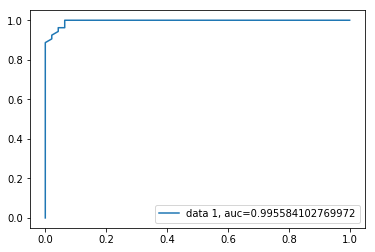

In [89]:
y_pred_proba = mod1_train.predict_proba(train.PropR.values.reshape(-1,1))[::,1]
fpr, tpr, _ = metrics.roc_curve(train.Republican,  y_pred_proba)
auc = metrics.roc_auc_score(train.Republican, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [90]:
train.columns

Index([u'State', u'Year', u'Rasmussen', u'SurveyUSA', u'DiffCount', u'PropR',
       u'Republican', u'SignedRep'],
      dtype='object')

In [91]:
#Taking two least correlated variables for model building

mod2 = LogisticRegression()
mod2_train = mod2.fit(train[['SurveyUSA', 'DiffCount']], train.Republican)

In [92]:
mod2_train.coef_

array([[0.49216386, 0.63048048]])

In [93]:
mod2_train.intercept_

array([-0.40266928])

In [94]:
y_pred = mod2_train.predict(train[['SurveyUSA', 'DiffCount']])

In [95]:
cnf_matrix = metrics.confusion_matrix(train.Republican, y_pred)

In [96]:
cnf_matrix

array([[45,  2],
       [ 0, 53]])

#### Evaluate the model on Test set

In [97]:
# Base model
test['SignedRep'] = test['Rasmussen'].apply(lambda x: np.sign(x))

/opt/cloudera/parcels/Anaconda-4.0.0/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [98]:
cross = pd.crosstab(index=test["Republican"], 
                             columns=test["SignedRep"],
                             margins=True)

cross
# train[['SignedRep','Republican']]

SignedRep,-1.0,0.0,1.0,All
Republican,,,,
0,18,2,4,24
1,0,0,21,21
All,18,2,25,45


In [99]:
y_test_pred = mod2_train.predict(test[['SurveyUSA', 'DiffCount']])

In [100]:
cnf_matrix = metrics.confusion_matrix(test.Republican, y_test_pred)

In [101]:
cnf_matrix

array([[23,  1],
       [ 0, 21]])